In [1]:
!pip install deepface
!pip install matplotlib
!pip install opencv-python
!pip install fpdf

     |████████████████████████████████| 65 kB 3.2 MB/s 
     |████████████████████████████████| 60.5 MB 1.2 MB/s 
     |████████████████████████████████| 87 kB 7.2 MB/s 
     |████████████████████████████████| 2.3 MB 57.7 MB/s 
     |████████████████████████████████| 462 kB 72.8 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=0ca6fa5ad7af85ac9356a558f03fa2a042429632b92ef17a8bf8364859e2c99f
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
Successfully built fire
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have im

In [2]:
from deepface import DeepFace
from fpdf import FPDF
import cv2
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [3]:
!git clone https://github.com/33220311/DeepFace

Cloning into 'DeepFace'...
remote: Enumerating objects: 470, done.
remote: Counting objects: 100% (470/470), done.
remote: Compressing objects: 100% (357/357), done.
remote: Total 470 (delta 111), reused 470 (delta 111), pack-reused 0
Receiving objects: 100% (470/470), 66.43 MiB | 27.47 MiB/s, done.
Resolving deltas: 100% (111/111), done.


In [4]:
detectors = ["opencv", "ssd", "mtcnn", "dlib", "retinaface"]
metrics = ["cosine", "euclidean", "euclidean_l2"]
models = ["VGG-Face", "Facenet", "OpenFace", "DeepFace", "DeepID", "Dlib", "ArcFace"]

In [5]:
import sys
!mkdir dataset #untuk mennyimpan data set setelah crop face dari source
!mkdir datatest #untuk mennyimpan data test setelah crop face dari folder

In [22]:
import os
from pathlib import Path
source = '/content/DeepFace/Database/'
folder ='/content/DeepFace/Test Dataset/'
Hsl='/content/drive/MyDrive/DatasetDeepFacelib/Hasil6/'
sourceConv='/content/dataset'
folderConv='/content/datatest'

In [7]:
def bondRetFace(im):
  imbound=DeepFace.detectFace(img_path = im, target_size = (224, 224), enforce_detection=False,detector_backend = detectors[4])
  return imbound

In [8]:
def bondOpenCV(im):
  imbound=DeepFace.detectFace(img_path = im, target_size = (100, 100), enforce_detection=False,detector_backend = detectors[0])
  return imbound

In [9]:
def bondDlib(im):
  imbound=DeepFace.detectFace(img_path = im, target_size = (100, 100), enforce_detection=False,detector_backend = detectors[3])
  return imbound

In [10]:
def bondMtcnn(im):
  imbound=DeepFace.detectFace(img_path = im, target_size = (100, 100), enforce_detection=False,detector_backend = detectors[2])
  return imbound

In [11]:
import numpy as np
def load_images_from_folder(folder):
    images = []
    labels=[]    
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
          #kernel = np.ones((3,3),np.float32)/25
          #fimg=cv2.filter2D(img,-1,kernel)
          images.append(bondDlib(img))
          #menggunakan detector bounding face Dlib untuk mrnghasilkan gambar baru berupa wajahnya sj
          labels.append(Path(filename).stem)
    return images,labels

In [12]:
x,lbl=load_images_from_folder(folder)
countData=len(x)
countData

Downloading...
From: http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
To: /root/.deepface/weights/shape_predictor_5_face_landmarks.dat.bz2


shape_predictor_5_face_landmarks.dat.bz2 is going to be downloaded


100%|██████████| 5.71M/5.71M [00:00<00:00, 6.03MB/s]


118

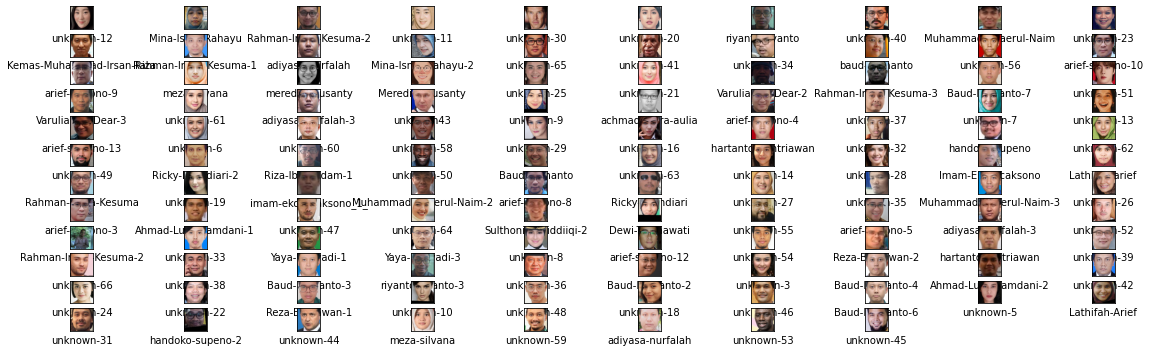

In [13]:
plt.figure(figsize=(20,10))
for i in range(countData):
    plt.subplot(20,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x[i])
    plt.imsave("/content/datatest/"+lbl[i]+".jpg", x[i], format='jpg')
    plt.xlabel(lbl[i])
plt.show()

In [14]:
y,lbly=load_images_from_folder(source)
countDatay=len(y)
countDatay

28

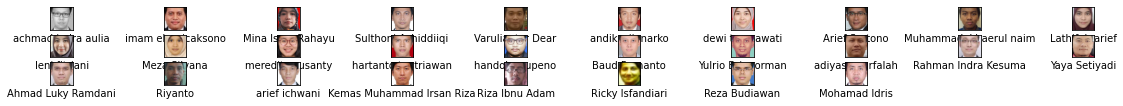

In [23]:
plt.figure(figsize=(20,10))
for i in range(countDatay):
    plt.subplot(20,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(y[i])
    plt.imsave("/content/dataset/"+lbly[i]+".png", y[i], format='png')
    plt.xlabel(lbly[i])
plt.show()

In [16]:
def createFile(cetak, filename, accuracy):
  pdf = FPDF()
  pdf.add_page()
  pdf.set_font("Arial", size = 15)
  str1 = "      "
  for i in range(len(cetak)):
    teks = str1.join(cetak[i])
    pdf.cell(200, 10, txt = teks, ln = 1, align = 'L')
  
  pdf.cell(200, 10, txt = "accuracy = "+ accuracy, ln = 1, align = 'L')
  pdf.output(filename)

In [ ]:
from sklearn.metrics import confusion_matrix

In [17]:
def runModel(folder, source, model, metric, detector):
  cetak = []
  true = 0
  false = 0
  #valtrue=[]
  #val=[]
  for filename in os.listdir(folder):
    name = filename.split("-")

    file = os.path.join(folder,filename)
    df = DeepFace.find(img_path=file, db_path = source, model_name = model, distance_metric = metric, detector_backend = detector, enforce_detection=False,normalization='')
    #valtrue.append(1)
    if df.empty:
      result = "unknown"
    else:  
      result = df['identity'][0]
      result = result.split("/")
      result = result[len(result)-1]
      result = result.split(" ")
      result = result[0]

    if result.lower() == name[0].lower():
      true = true + 1
      prediction ="benar"
      #val.append(1)
    else:
      false = false + 1
      prediction = "salah"
     # val.append(0)

    cetak.append([filename,result,prediction])
    accuracy = str((true / (true+false)) * 100)
  
  return cetak,accuracy

In [ ]:
hasil = []
for i in range(len(models)):
  model = models[i]
  for j in range(len(detectors)):
    detector = detectors[j]
    for k in range(len(metrics)):
      metric = metrics[k]

      cetak,accuracy= runModel(folderConv,sourceConv, model, metric, detector)

      hasil.append([model, metric, detector,accuracy])
      outputfile = Hsl+model+"-"+detector+"-"+metric+"-"+accuracy+".pdf"
      createFile(cetak, outputfile,accuracy)
      #outputfile = model+"-"+detector+"-"+metric+".pdf"
      #outputfile = Hsl+model+"-"+detector+"-"+metric+"-"+acc+".pdf"
      #createFile(cetak, outputfile, acc)

Streaming output truncated to the last 5000 lines.
There are  28  representations found in  representations_openface.pkl
find function lasts  0.36417293548583984  seconds
There are  28  representations found in  representations_openface.pkl
find function lasts  0.36667299270629883  seconds
There are  28  representations found in  representations_openface.pkl
find function lasts  0.3695368766784668  seconds
There are  28  representations found in  representations_openface.pkl
find function lasts  0.3447456359863281  seconds
There are  28  representations found in  representations_openface.pkl
find function lasts  0.3443882465362549  seconds
There are  28  representations found in  representations_openface.pkl
find function lasts  0.3262057304382324  seconds
There are  28  representations found in  representations_openface.pkl
find function lasts  0.34409403800964355  seconds
There are  28  representations found in  representations_openface.pkl
find function lasts  0.32546472549438477  s

In [ ]:
hasil

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
